https://stackoverflow.com/questions/77669310/double-exponential-fit-in-python

In [2]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy import optimize, integrate
from sklearn.metrics import r2_score

In [3]:
def logistic(x, a, b):
    return 1. / (1. + np.exp(a * (x - b)))

In [8]:
def model(x, a, b):
    return nd.Derivative(logistic)(x, a, b)

In [9]:
p0 = [1, 10]

In [21]:
np.random.seed(12345)
t = np.linspace(0, 20, 50)
x = model(t, *p0)
s = 0.00001 * np.ones_like(x)
n = s * np.random.normal(size=x.size)
x += n

In [22]:
popt, pcov = optimize.curve_fit(model, t, x, sigma=s, p0=[1, 5], absolute_sigma=True)
popt, pcov

(array([ 0.99997865, 10.0000394 ]),
 array([[3.72189482e-10, 1.22753026e-15],
        [1.22753026e-15, 1.22456936e-09]]))

In [23]:
xhat = model(t, *popt)
score = r2_score(x, xhat)
score

0.9999999787890769

In [24]:
tlin = np.linspace(t.min(), t.max(), 200)
xlin = model(tlin, *popt)

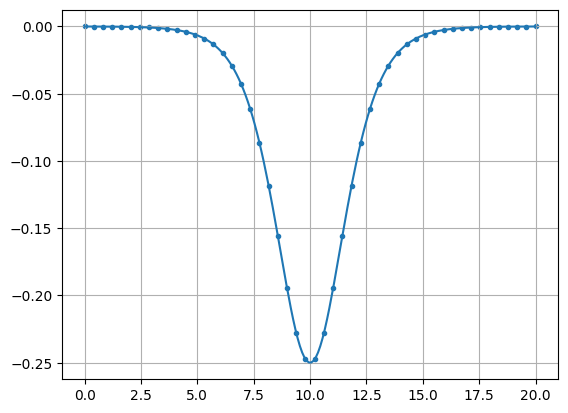

In [25]:
fig, axe = plt.subplots()
axe.scatter(t, x, marker=".")
axe.plot(tlin, xlin)
axe.grid()